In [1]:
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.patches import Polygon
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import pandas as pd

In [2]:
# backround color
background_color='#f7f7f7'

# font style
font_path_1 = 'E:\Project\Football\Pass\Quantico\Quantico-Bold.ttf'
font_path_2 = 'E:\Project\Football\Pass\Quantico\Quantico-Regular.ttf'
font_prop_1 = font_manager.FontProperties(fname=font_path_1)
font_prop_2 = font_manager.FontProperties(fname=font_path_2)

In [3]:
# open image
def open_image(path_to_image):
    image = Image.open(path_to_image) # Open the image
    image_array = np.array(image) # Convert to a numpy array
    return image_array # Output

image = open_image('E:\Project\Football\Pass\DFBEagle.png')

In [4]:
# get event dataframe for game 3942226
parser = Sbopen()
df, related, freeze, tactics = parser.event(3942226)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4463 non-null   object 
 1   index                           4463 non-null   int64  
 2   period                          4463 non-null   int64  
 3   timestamp                       4463 non-null   object 
 4   minute                          4463 non-null   int64  
 5   second                          4463 non-null   int64  
 6   possession                      4463 non-null   int64  
 7   duration                        3321 non-null   float64
 8   match_id                        4463 non-null   int64  
 9   type_id                         4463 non-null   int64  
 10  type_name                       4463 non-null   object 
 11  possession_team_id              4463 non-null   int64  
 12  possession_team_name            44

In [6]:
# filter data for only passes from toni kroos
team1, team2 = df.team_name.unique()
mask_team1 = (df.type_name == 'Pass') & (df.player_name == 'Toni Kroos')

In [7]:
#filter data, so we only get the relevant data
df_pass = df.loc[mask_team1, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]

# if the outcome_name is null, it will count as successfull pass
mask_complete = df_pass.outcome_name.isnull()

In [8]:
# calculate the number of successfull passes
successful_pass = mask_complete.sum()

# calculate the number of unsucessfull passes
unsucessful_pass = (~mask_complete).sum()

# calculate the number of passess
number_of_pass = successful_pass + unsucessful_pass

# calculate percentage of successful passess
percentage_of_pass = round((successful_pass/number_of_pass)*100)

In [9]:
df_pass.head()

,x,y,end_x,end_y,outcome_name
7,54.2,40.1,90.4,30.7,Incomplete
26,61.1,26.5,61.7,40.3,NaN
52,44.9,54.6,40.3,56.6,NaN
198,36.7,50.7,49.5,48.8,NaN
246,28.2,66.8,20.2,71.2,NaN


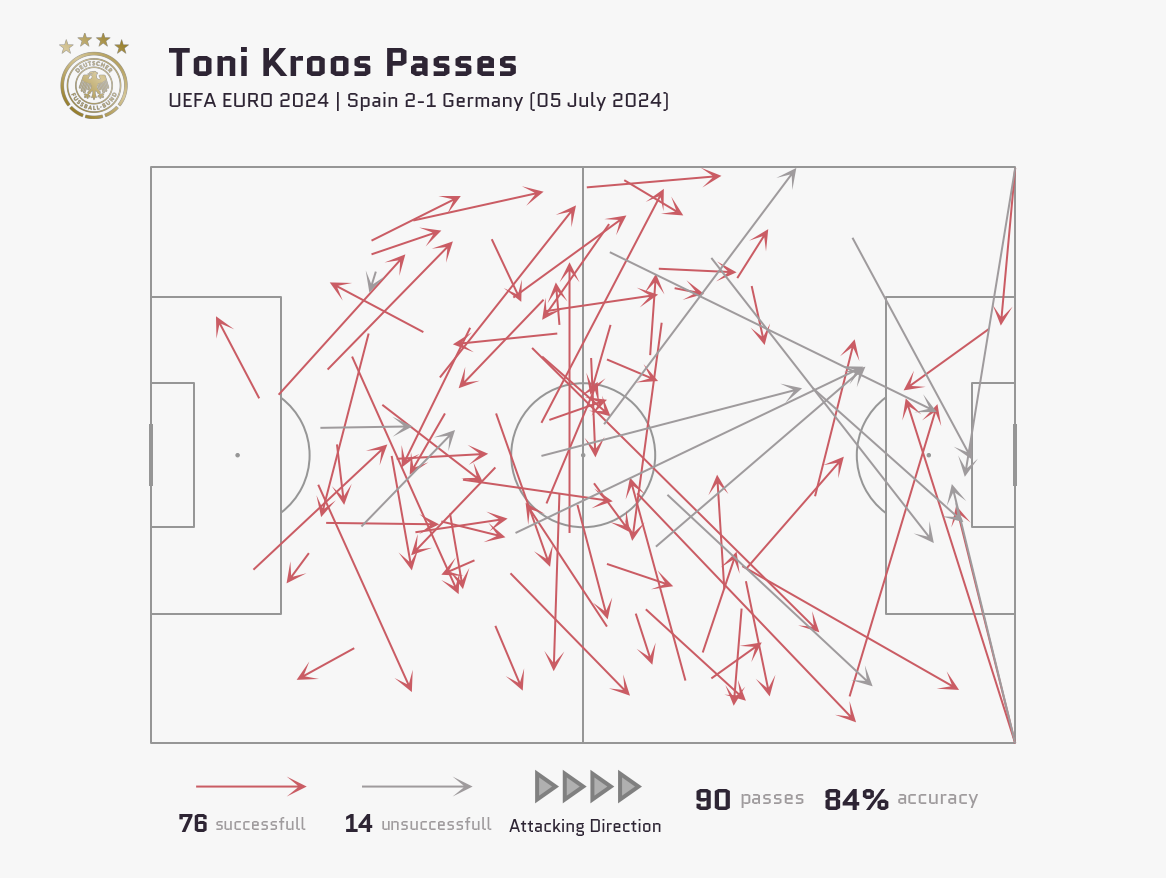

In [11]:
fig = plt.figure(figsize=(16,12))
fig.patch.set_facecolor(background_color)

# logo
ax1 = fig.add_axes([0, 0.77, 0.15, .1])
ax1.imshow(image)

ax1.set_axis_off()


# title
ax2 = fig.add_axes([0, 0.7, 1, .2])
ax2.set_facecolor(background_color)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

ax2.text(
    x=0.14, 
    y=.60, 
    s='Toni Kroos Passes', 
    fontsize=40, 
    fontproperties=font_prop_1, 
    fontweight='bold', 
    color='#2e2534'
)

ax2.text(
    x=0.14, 
    y=.42, 
    s='UEFA EURO 2024 | Spain 2-1 Germany (05 July 2024)', 
    fontsize=20, 
    fontproperties=font_prop_2, 
    fontweight='bold', 
    color='#2e2534'
)

ax2.set_axis_off()

# Set up the pitch
pitch = Pitch(
    pitch_type='statsbomb', 
    pitch_color='#f7f7f7', 
    line_color='#969696')
ax3 = fig.add_axes([.1, .006, .8, .75])
ax3.set_facecolor(background_color)

pitch.draw(ax=ax3)


# Plot the successful passes
pitch.arrows(df_pass[mask_complete].x, 
             df_pass[mask_complete].y,
             df_pass[mask_complete].end_x, 
             df_pass[mask_complete].end_y, 
             width=2,
             headwidth=10, 
             headlength=10, 
             color='#ca5c64', 
             ax=ax3)

# Plot the unsucessful passes
pitch.arrows(df_pass[~mask_complete].x, 
             df_pass[~mask_complete].y,
             df_pass[~mask_complete].end_x, 
             df_pass[~mask_complete].end_y,  
             width=2,
             headwidth=10, 
             headlength=10,
             color='#9f9b9d', 
             ax=ax3)

ax3.set_axis_off()

# legend and caption
ax4 = fig.add_axes([.1, -.1, .8, .15])  # Adjust bottom position to -.1 to place it below the pitch
ax4.set_facecolor(background_color)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

# arrows for successful passes
pitch.arrows(
    xstart=0.08, 
    ystart=0.65, 
    xend=0.2, 
    yend=0.65, 
    width=2, 
    headwidth=10, 
    headlength=10, 
    color='#ca5c64', 
    ax=ax4 
)

# arrows for unsuccessful passes
pitch.arrows(
    xstart=0.26, 
    ystart=0.65, 
    xend=0.38, 
    yend=0.65, 
    width=2, 
    headwidth=10, 
    headlength=10, 
    color='#9f9b9d', 
    ax=ax4 
)

ax4.text(
    x=0.06, 
    y=0.3, 
    s=f'{successful_pass}',
    fontproperties=font_prop_1, 
    fontsize=25,  
    color='#2e2534', 
    fontweight='bold'
)

ax4.text(
    x=0.1, 
    y=0.32, 
    s='successfull', 
    fontproperties=font_prop_2,
    fontsize=17,  
    color='#9f9b9d', 
)

ax4.text(
    x=0.24, 
    y=0.3, 
    s=f'{unsucessful_pass}',
    fontproperties=font_prop_1, 
    fontsize=25,  
    color='#2e2534', 
    fontweight='bold'
)

ax4.text(
    x=0.28, 
    y=0.32, 
    s='unsuccessfull', 
    fontproperties=font_prop_2,
    fontsize=17,  
    color='#9f9b9d', 
)

ax4.text(
    x=0.62, 
    y=0.47, 
    s=f'{number_of_pass}',
    fontproperties=font_prop_1, 
    fontsize=30,  
    color='#2e2534', 
    fontweight='bold'
)

ax4.text(
    x=0.67, 
    y=0.52, 
    s='passes', 
    fontproperties=font_prop_2,
    fontsize=20,  
    color='#9f9b9d', 
)

ax4.text(
    x=0.76, 
    y=0.47, 
    s=f'{percentage_of_pass}%',
    fontproperties=font_prop_1, 
    fontsize=30,  
    color='#2e2534', 
    fontweight='bold'
)

ax4.text(
    x=0.84, 
    y=0.52, 
    s='accuracy', 
    fontproperties=font_prop_2,
    fontsize=20,  
    color='#9f9b9d', 
)

# add arrows for direction
def draw_custom_arrow(ax, x, y, width=0.002, height=0.005, color_fill='#b0b0b0', color_outline='gray', linewidth=4):
    # coordinate for triangle
    triangle = [
        (x, y),                # start point (left bottom)
        (x + width, y + height / 2),  # Titik ujung (puncak segitiga di tengah kanan)
        (x, y + height),       # end point (left top)
    ]
    # add triangle to axes
    ax.add_patch(Polygon(triangle, closed=True, edgecolor=color_outline, facecolor=color_fill, linewidth=linewidth))

# 4 arrows for attacking direction
draw_custom_arrow(ax4, x=0.45, y=0.55, width=0.02, height=0.2)
draw_custom_arrow(ax4, x=0.48, y=0.55, width=0.02, height=0.2)
draw_custom_arrow(ax4, x=0.51, y=0.55, width=0.02, height=0.2)
draw_custom_arrow(ax4, x=0.54, y=0.55, width=0.02, height=0.2)

ax4.text(
    x=0.42, 
    y=0.3, 
    s='Attacking Direction', 
    fontproperties=font_prop_2,
    fontsize=17,  
    color='#2e2534', 
)
 
ax4.set_axis_off()